##### About LSTM (Long Short Term Memory)

    Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

    This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

    LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

    In this post, you will get insight into LSTMs using the words of research scientists that developed the methods and applied them to new and important problems.

    There are few that are better at clearly and precisely articulating both the promise of LSTMs and how they work than the experts that developed them.

##### About Keras

    Keras is a high-level neural networks API that simplifies the process of building and training deep learning models. Integrated with TensorFlow 2.x as tf.keras, it offers a user-friendly, modular interface for designing and implementing models. Keras supports quick prototyping with pre-built models and custom layers, and it provides utilities for handling and preprocessing data. Its ease of use and flexibility make it ideal for both beginners and experienced practitioners working on various machine learning tasks.

##### Importing require Libraries.

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# train stock is used to train the model.
train_stock = pd.read_csv('Google_Stock_Price_Train.csv')

# test stock is used to test the model.
test_stock = pd.read_csv('Google_Stock_Price_Test.csv')

In [6]:
train_stock.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


    About the DataSet 
        Date: The specific trading day for which the data is recorded. This column 
              helps in tracking the performance of the stock over time.

        Open: The price at which the stock first traded upon the opening of the market 
              on a given day. It indicates the initial trading price.

        High: The highest price at which the stock traded during the day. This value shows 
              the peak trading price within the given day.

        Low: The lowest price at which the stock traded during the day. This value indicates 
              the bottom trading price for the day.

        Close: The price at which the stock last traded upon the close of the market on a given day. 
              This is often used to analyze the stock’s performance and trends.

        Volume: The total number of shares traded during the day. It indicates the level of activity 
              or liquidity in the stock.

In [7]:
train_stock['Date'].value_counts()

Date
01-03-2012    1
4/30/2015     1
05-11-2015    1
05-08-2015    1
05-07-2015    1
             ..
09-04-2013    1
09-03-2013    1
8/30/2013     1
8/29/2013     1
12/30/2016    1
Name: count, Length: 1258, dtype: int64

In [8]:
train_stock[['High', 'Low']].describe()

,High,Low
count,1258.000000,1258.000000
mean,537.880223,529.007409
std,153.008811,150.552807
min,281.210000,277.220000
25%,406.765000,401.765000
50%,540.750000,532.990000
75%,662.587500,644.800000
max,816.680000,805.140000


    As there is some wrong entry in Date and we had to solve it so had to make them.

In [9]:
train_stock['Date'] = train_stock['Date'].astype(str)
train_stock['Date'] = train_stock['Date'].str.replace('/', '-', regex=False)
train_stock['Date'] = train_stock['Date']

In [7]:
train_stock['Date'] = pd.to_datetime(train_stock['Date'])

In [8]:
train_stock['Date'] = pd.to_datetime(train_stock['Date'], format = '%Y-%m-%d')
train_stock['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]

    Some there is some commas in Volume and Close that they are considered as string and have to give
    them ion number

In [9]:
train_stock['Volume'] = train_stock['Volume'].str.replace(',', '').astype(float)
train_stock['Close'] = train_stock['Close'].str.replace(',', '').astype(float)

In [10]:
train_stock['Volume']

0        7380500.0
1        5749400.0
2        6590300.0
3        5405900.0
4       11688800.0
           ...    
1253      623400.0
1254      789100.0
1255     1153800.0
1256      744300.0
1257     1770000.0
Name: Volume, Length: 1258, dtype: float64

In [11]:
train_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
train_stock.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


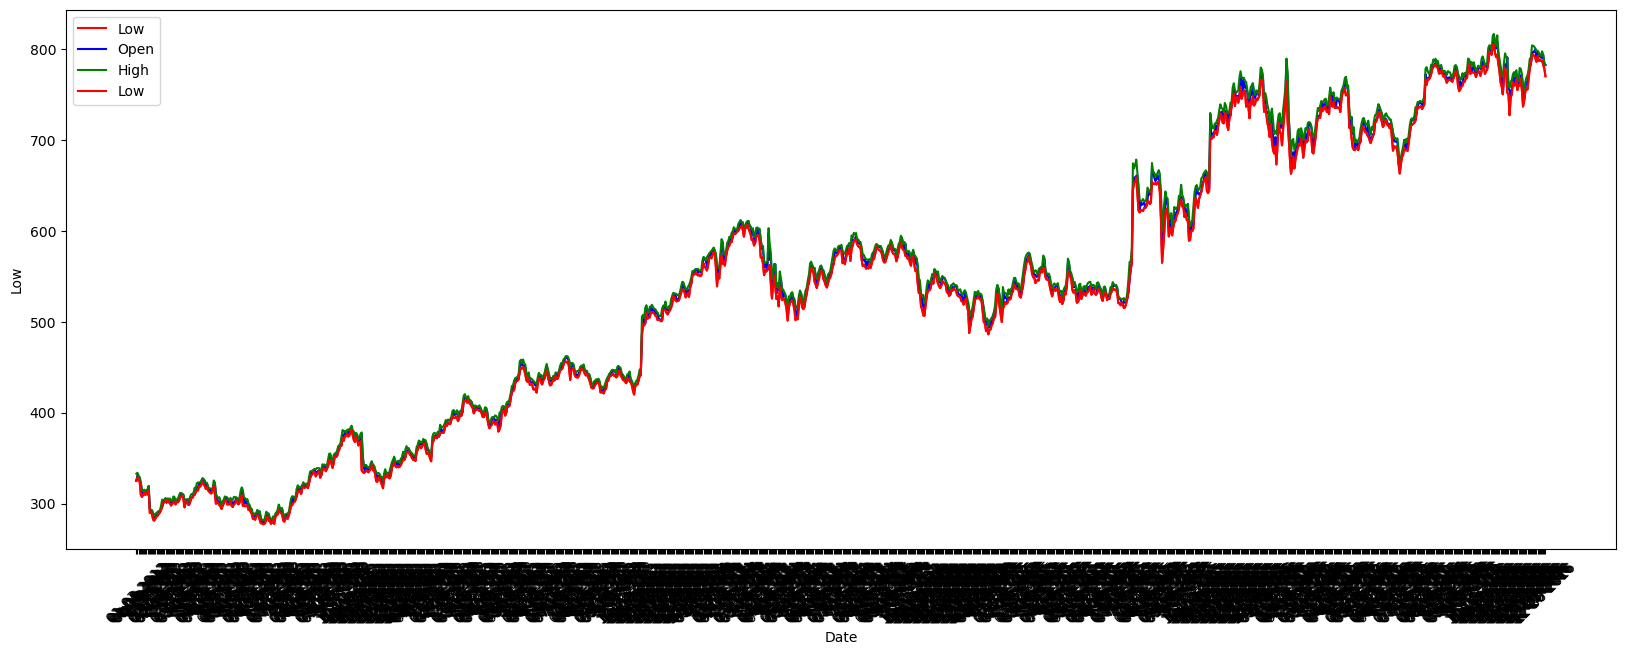

In [13]:
plt.figure(figsize = (20,7))
sns.lineplot(x = train_stock["Date"], y = train_stock["Low"], label = 'Low', color = 'red')
sns.lineplot(x = train_stock["Date"], y = train_stock["Open"], label = 'Open', color = 'blue')
sns.lineplot(x = train_stock["Date"], y = train_stock["High"], label = 'High', color = 'green')
sns.lineplot(x = train_stock["Date"], y = train_stock["Low"], label = 'Low', color = 'red')
plt.xticks(rotation = 45)
plt.show()

In [16]:
train_stock.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [19]:
# train_stock.set_index('Date', inplace=True)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [21]:
train = train_stock.iloc[:, 1:2].values
len(train)

1258

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = MinMaxScaler(feature_range=(0,1))
train_scaled = scale.fit_transform(train)

In [23]:
# 60 previous stock prices before the given day 
x_train = []
# Stock price of next day
y_train = []

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [25]:
model = Sequential()

# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# Add Regularization 
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Add output layer 
model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer= 'adam',
             loss='mean_squared_error')

In [28]:
model.fit(x_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - loss: 0.0805
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0098
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0070
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0044
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0052
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0055
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0049
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 0.0049
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

In [29]:
stock_price = test_stock.iloc[:, 1:2].values

In [30]:
total_df = pd.concat((train_stock['Open'], test_stock['Open']), axis = 0)
inputs = total_df[len(total_df) - len(test_stock) -  60:].values
inputs = inputs.reshape(-1, 1)
inputs = scale.transform(inputs)

In [31]:
x_test = []

for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


array([[0.94855535],
       [0.94295025],
       [0.943437  ],
       [0.94623697],
       [0.9527557 ],
       [0.96415937],
       [0.97438025],
       [0.9781356 ],
       [0.9783379 ],
       [0.97767687],
       [0.97724235],
       [0.9768468 ],
       [0.9765693 ],
       [0.9776405 ],
       [0.9795052 ],
       [0.9886099 ],
       [1.002149  ],
       [1.0163506 ],
       [1.0234733 ],
       [1.0144635 ]], dtype=float32)

In [33]:
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[789.13293],
       [786.1316 ],
       [786.3922 ],
       [787.89154],
       [791.3821 ],
       [797.48846],
       [802.9614 ],
       [804.9723 ],
       [805.0806 ],
       [804.7266 ],
       [804.49396],
       [804.28217],
       [804.1336 ],
       [804.70715],
       [805.7056 ],
       [810.581  ],
       [817.83075],
       [825.4353 ],
       [829.24927],
       [824.4248 ]], dtype=float32)

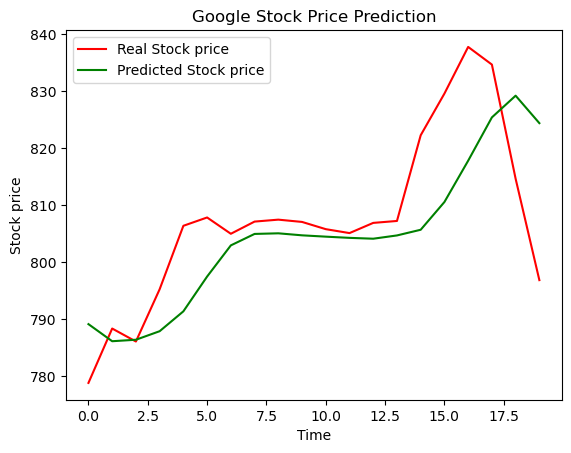

In [34]:
plt.plot(stock_price, color = 'red', label = 'Real Stock price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()